<a href="https://colab.research.google.com/github/ArkapratimDas0707/PROJECTS/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction( Exploratory Data Aalysis + Testing different Classification models)**

**Abstract**

This project has two focusses.Firstly, to perform Exploratory Data Analysis by creating fun, appealing visualisations using **Plotly,Seaborn and Matplotlib**

It walso uses Kaggle API to retrieve data.

It's next focus is data cleaning, pre-processing and predictive modelling. this project aims to fit the data through popular Machine Learning models like Logoistic Regression. The results of **Logistic Regression** will be used a control to test ensemble methods such as **Random Forest** and **XGBoost**.

Finally, the data will be fed through an **Artificial Neural Network**.

The results will be comapred to pick the best model/algorithm and we will try to understand the reason for it.





In [300]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


In [282]:
import os
import zipfile

## dataset name and target folder

dataset = 'blastchar/telco-customer-churn'
output_folder = 'telco_customer_churn'

# Ensure the target folder exists
os.makedirs(output_folder, exist_ok=True)

# Download the dataset using Kaggle API
print("Downloading Telco Customer Churn dataset from Kaggle...")
os.system(f'kaggle datasets download -d {dataset} -p {output_folder}')

# Find the downloaded zip file
zip_file = os.path.join(output_folder, 'telco-customer-churn.zip')

# Unzip the dataset
if os.path.exists(zip_file):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(output_folder)
    os.remove(zip_file)
    print(f"Dataset extracted to '{output_folder}' folder.")
else:
    print("Failed to download the dataset.")

print("Download and extraction complete!")


Extracting dataset...
Dataset extracted to 'telco_customer_churn' folder.
Download and extraction complete!


In [323]:
### Loading Telco Customer Churn data
df = pd.read_csv('telco_customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [285]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [289]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [290]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [291]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


11 null values in the Total Charges column

In [292]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


It seems like customers with unavailable total charges also have 0 tenure. Furthermore, since it is only 11 entries, it is a better decision to remove them.

In [321]:
r = df.loc[df['TotalCharges'].isnull(), 'tenure']
print(r)

Series([], Name: tenure, dtype: int64)


In [322]:
df=df.dropna(axis=0) ## removing all rows with null values

In [324]:
df.reset_index()  ## reset index

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [297]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x: 'Yes' if x==1 else 'No') ## converting Senior citizen into a categorical column

**EXPLORATORY DATA ANALYSIS**

Lets look at some variables that might be contributing to the customer churn. For that purpose, we conduct some bivariate analyses. We are more interested in the monthly charges, type of contract, tenure and total charges. We are also going to see if the type of internet service and payment method has any significant effect.

I am opting to use **Plotly** as much as I can as it produces modern beautiful, and most importantly, interactive graphs.

In [327]:
                                                 ########## CHURN BY CONTRACT-tYPE ##############


fig = px.bar(df,
             x='Contract',
             y=df['MonthlyCharges']/1000,
             color='Churn',
             color_discrete_map={'Yes': '#8A2BE2', 'No': '#00FFFF'},
             title="Churn by Contract Type")

# Proper y-axis formatting without division
fig.update_layout(
    yaxis=dict(
        tickformat='.2f',   # Two decimal places without scaling
        separatethousands=False,  # No thousands abbreviation
        title="Monthly Charges"
    ),
    xaxis=dict(
        title="Contract Type"
    ),
    template='presentation',
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font=dict(family="Arial", size=14, color="white"),
    title_font=dict(size=22, color='white'),
    legend=dict(
        bgcolor="#222",
        bordercolor="black",
        borderwidth=1
    )
)



fig.show()




---





It seems the churn rate for pay-as-you-go or month to month is significantly higher than customers with 1 or 2 year commitments.






---



In [302]:
                                               ########### CHURN BY INTERNET SERVICE TYPE ################

fig = px.bar(df,
             x='InternetService',
             color='Churn',
             barmode='group',
             color_discrete_map={'Yes': '#FF00FF', 'No': '#1F77B4'},
             title="Churn by Internet Service Type")

fig.update_layout(
    template='presentation',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='#000000',
    font=dict(family="Arial", size=14, color="white"),
    title_font=dict(size=20, color='white'),
    xaxis=dict(showgrid=True, gridcolor='#444', linecolor='white', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='#444', linecolor='white', linewidth=2)
)

fig.show()



---



It seems from the plot that customers with Fibre-optic connection are more likely to churn. However, it might not be because the Fibre-optic internet service is bad, but most likely, it is correlated to the cost. Let's plot Monthly Charges to Internet Service and see if we get the same pattern.



---



In [362]:
                                               ############### Monthly charges by Internet Service Type #################
fig = px.bar(df,
             x='InternetService',
             y=df['MonthlyCharges']/1000,
             color='Churn',
             barmode='group',
             color_discrete_map={'Yes': '#FF00FF', 'No': '#1F77B4'},
             title="Monthly charges by Internet Service Type")

fig.update_layout(
    template='presentation',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='#000000',
    font=dict(family="Arial", size=14, color="white"),
    title_font=dict(size=20, color='white'),
    xaxis=dict(showgrid=True, gridcolor='#444', linecolor='white', linewidth=2),
    yaxis=dict(showgrid=True, gridcolor='#444', linecolor='white', linewidth=2)
)

fig.show()



---



As suspected, it seems to be the monthly charges thats too expensive for the customers who are churning. The plot exhibits almost the exact same pattern.



---



In [303]:
                                         ################# Density plot: Monthly charges to Churn #################
import plotly.graph_objects as go

# Generate KDE using seaborn
sns_kde = sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], bw_adjust=0.5)
sns_kde_no = sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], bw_adjust=0.5)
plt.close()

# Get the x and y values from seaborn
x_yes = sns_kde.get_lines()[0].get_xdata()
y_yes = sns_kde.get_lines()[0].get_ydata()
x_no = sns_kde.get_lines()[1].get_xdata()
y_no = sns_kde.get_lines()[1].get_ydata()

# Plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_yes, y=y_yes,
    mode='lines',
    name='Churn: Yes',
    line=dict(color='#E74C3C', width=3)
))

fig.add_trace(go.Scatter(
    x=x_no, y=y_no,
    mode='lines',
    name='Churn: No',
    line=dict(color='#3498DB', width=3)
))

# Update layout
fig.update_layout(
    title='🔥 Monthly Charges vs Churn (KDE)',
    template='plotly_dark',
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    xaxis_title="Monthly Charges",
    yaxis_title="Density"
)

fig.show()




---



The number of churned customers seems to increase drastically as the monthly charges increase.



---



In [304]:
                                       ################ Violin-plot: Tenure vs Churn ##############

import plotly.express as px

fig = px.violin(df,
                x='Churn',
                y='tenure',
                color='Churn',
                box=True,  # Show the box plot inside
                points='all',  # Show individual points
                color_discrete_map={'Yes': '#E74C3C', 'No': '#3498DB'},
                title="Tenure vs Churn (Violin Plot)")

# Styling improvements
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font=dict(family="Arial", size=14, color="white"),
    title_font=dict(size=22, color='white')
)

fig.show()




---



From the plot, it seems like long term customers are more loyal to the company, which is expected. Most of the churned customers seem to be new( <1 year)



---



In [305]:
                                       ############ Payment Type ###############
# Pivot table for the heatmap
heatmap_data = df.pivot_table(index='PaymentMethod',
                              columns='Churn',
                              aggfunc='size',
                              fill_value=0)

#  heatmap with Plotly
fig = px.imshow(heatmap_data,
                color_continuous_scale='viridis',  # Modern color scale
                labels=dict(x="Churn", y="Payment Method", color="Count"),
                title= "Payment Method vs Churn")

# Styling
fig.update_layout(
    template='plotly_white',
    plot_bgcolor='#000000',
    paper_bgcolor='#000000',
    font=dict(family="Arial", size=14, color="white"),
    title_font=dict(size=22, color='white'),
    xaxis=dict(
        side="top",  # Puts x-axis labels at the top for modern feel
        showgrid=False
    ),
    yaxis=dict(
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="Count",
        tickmode="array"
    )
)

fig.show()




---



It appears most the churned customers made payments through electronic checks. I am not quite sure if that should have any effect. May be it is not convenient, may be the platform is not user friendly. We can get more insights when we build a predictive model and examine the importance of this feature.




---



In [306]:
                                    ############### Total charges vs Monthly charges ######################

import plotly.express as px

fig = px.scatter(df,
                 x='MonthlyCharges',
                 y='TotalCharges',
                 color='Churn',
                 size='tenure',
                 color_discrete_map={'1': 'red', '0': 'blue'},
                 hover_name='Contract',
                 title="Total Charges vs Monthly Charges")

# Add trendline
b, m = polyfit(df['MonthlyCharges'], df['TotalCharges'], 1)
fig.add_trace(
    dict(
        x=df['MonthlyCharges'],
        y=m * df['MonthlyCharges'] + b,
        mode='lines',
        line=dict(color='orange', width=2),
        name='Trendline'
    )
)

# Add annotation
fig.add_annotation(
    x=70, y=5000,
    text="Notice higher charges = higher total",
    showarrow=True,
    arrowhead=2,
    arrowcolor='white'
)

# Axis and grid styling
fig.update_xaxes(showgrid=True, gridcolor='#444', linecolor='white', linewidth=2)
fig.update_yaxes(showgrid=True, gridcolor='#444', linecolor='white', linewidth=2)

# Customize layout
fig.update_layout(
    title_font_size=20,
    legend=dict(title='Churn', orientation='h', yanchor='bottom', y=1, xanchor='right', x=1),
    template='plotly_dark',
    font=dict(size=12),
)

fig.show()




---



As expected, its an extremely linear relationship. The density of Churned customer seems really high as the monthly charges increase.

It is an interactive plot like the others, with each data point containing information about **tenure** as well. All the information is visible as cards as you hover on the point! Thats the beauty of plotly graphs!






---



**Data Preprocessing and Model Building**

Lets clean up the data more and process it so that it can be fed through Machine Learning and Deep Learning algorithms.

In this project, I have selected one each of


1.   Machine Learning: Logistic Regression
2.   Ensemble method: Random Forest and XGBoost Classifier
3.   Deep Learning: ANN






---



In [308]:
### Drop Customer ID ###

df=df.drop(['customerID'], axis=1)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [310]:
# Replace 'Yes' and 'No' in the 'Churn' column with 1 and 0, respectively
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].astype(int)



---



Note: I opted to not encode 'Churn' as it is the response variable and I require it to be a single feature instead of 2 features.

The rest  of the categorical columns needed to be encoded.



---



In [311]:
#  Identify Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# One-Hot Encode All Categorical Columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)  # Keep all binary categories

# Convert boolean columns to integers (if any)
for col in df_encoded.select_dtypes(include='bool').columns:
    df_encoded[col] = df_encoded[col].astype(int)

#  Check Results
df_encoded.head()


,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [312]:
df_encoded.info() ## Check if all features are in the correct datatype for model building.

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   SeniorCitizen_No                         7032 non-null   int64  
 7   SeniorCitizen_Yes                        7032 non-null   int64  
 8   Partner_No                               7032 non-null   int64  
 9   Partner_Yes                              7032 non-null   int64  
 10  Dependents_No                            7032 non-nul

In [313]:
df_encoded.isnull().sum() ## Check if there is any nulls

,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0
gender_Female,0
gender_Male,0
SeniorCitizen_No,0
SeniorCitizen_Yes,0
Partner_No,0
Partner_Yes,0




---



 **MODEL 1: LOGISTIC REGRESSION WITH ALL FEATURES**



---



 Accuracy: 0.7867803837953091

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


 Confusion Matrix:
 [[914 119]
 [181 193]]

 ROC AUC: 0.8318614077682468


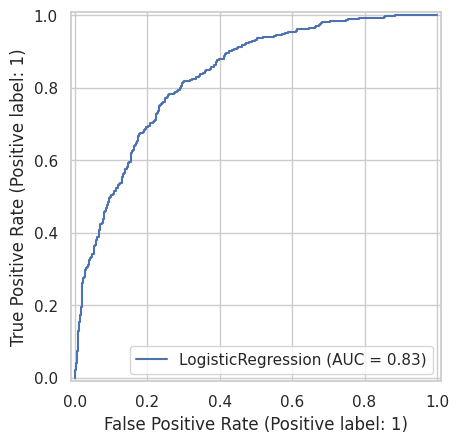

In [341]:
## Scale the data ##

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

#Define Features and Target
X = df_encoded.drop('Churn', axis=1)  # Drop the target column
y = df_encoded['Churn']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Scale the Numeric Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000, C=1.0, random_state=42)  # C = Inverse of regularization strength
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of positive class

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n ROC AUC:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)




---



**MODEL PERFORMANCE**: Logistic Regression did a decent good job with an accuracy of **78.67%** with high Precison, Recall and F-score with respect to customers that didnt churn. However, the actual churned customers were not predicted very well.

An AUC>0.8 indicates that the model is clinically useful.



---



**MODEL 2: Random Forest Classifier with all features**



---



\Accuracy: 0.7839374555792467
\ Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407

\ Confusion Matrix:
 [[931 102]
 [202 172]]

 ROC AUC: 0.8115400344772248


<ipython-input-342-5bf1b72d9c33>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




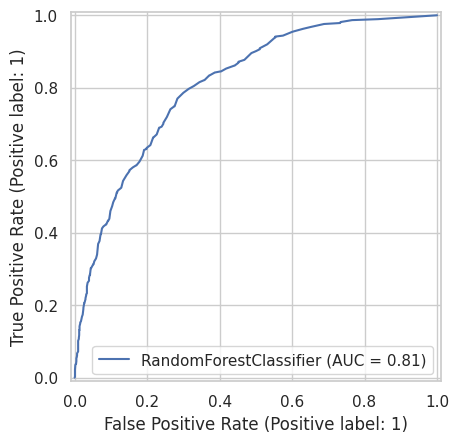

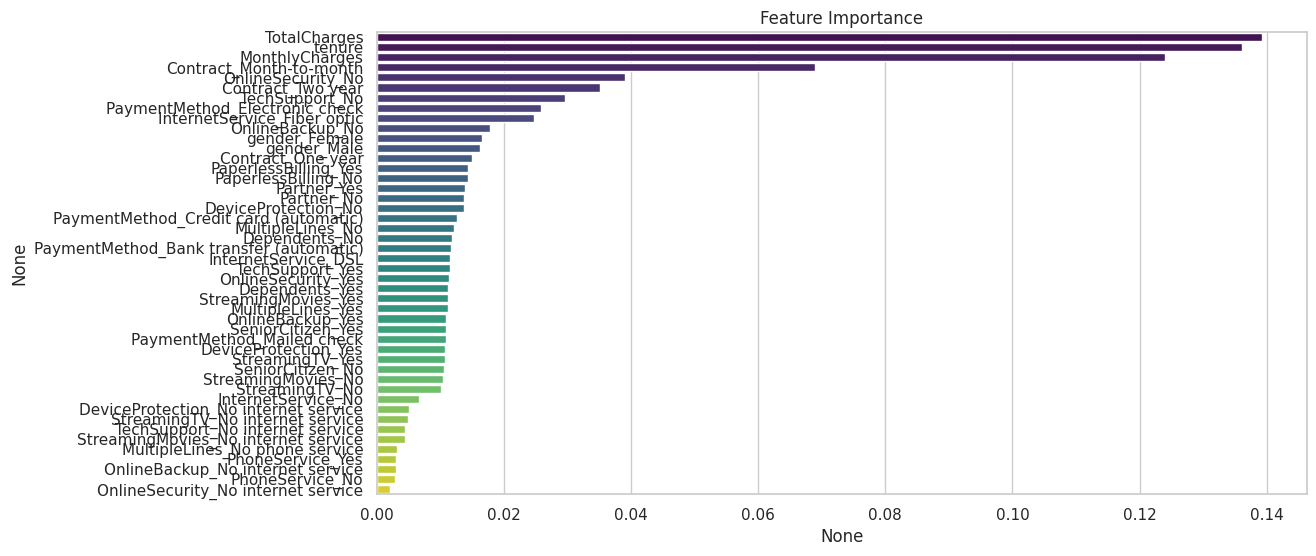

In [342]:
## Fit random forest model
rf_model = RandomForestClassifier(n_estimators=100,
                                  class_weight='balanced',
                                  max_depth=None,
                                  min_samples_split=2,
                                  random_state=42)

rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("\Accuracy:", accuracy_score(y_test, y_pred))
print("\ Classification Report:\n", classification_report(y_test, y_pred))
print("\ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n ROC AUC:", roc_auc_score(y_test, y_prob))

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)

#Feature Importance

# Get feature importance and sort
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=importance, y=importance.index, palette="viridis")
plt.title("Feature Importance")
plt.show()



---



**Model Performance:** Performance is similar to the Logistic Regression model in terms of accuracy, but is still unable to capture a lot of True Positives as evident from the low recall score.

The **AUC is still greater than 0.80** indicating a usable model.

Now that we have plotted the feature importances, it seems that the top 5 features are the ones that contribute towards explaining most of the variance in the data. One can opt for a Principal Cmponent analysis to reduce dimensions at this point. However, to maintain interpretability, I am choosing to just take the top 10 features and run it through Random forest again and see if it affects the accuracy to any significant extent.

Furthermore, I opted to fine-tune the Random Forest model by finding the perfect threshold for maximum precision and recall.



---



Top 10 Features:
 Index(['TotalCharges', 'tenure', 'MonthlyCharges', 'Contract_Month-to-month',
       'OnlineSecurity_No', 'PaymentMethod_Electronic check', 'TechSupport_No',
       'InternetService_Fiber optic', 'Contract_Two year', 'OnlineBackup_No'],
      dtype='object')

 Accuracy with Top 10 Features: 0.7782515991471215

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407


 Confusion Matrix:
 [[914 119]
 [193 181]]

 ROC AUC with Top 10 Features: 0.8150537606576557


<ipython-input-350-0238a7ccd866>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




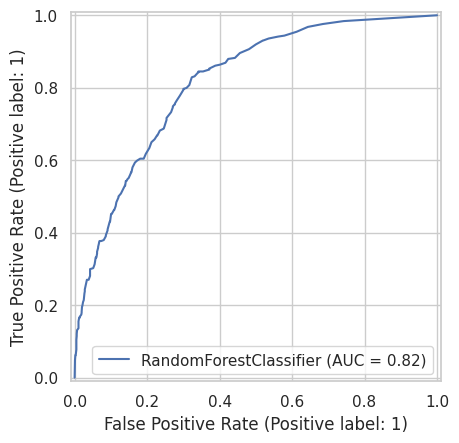

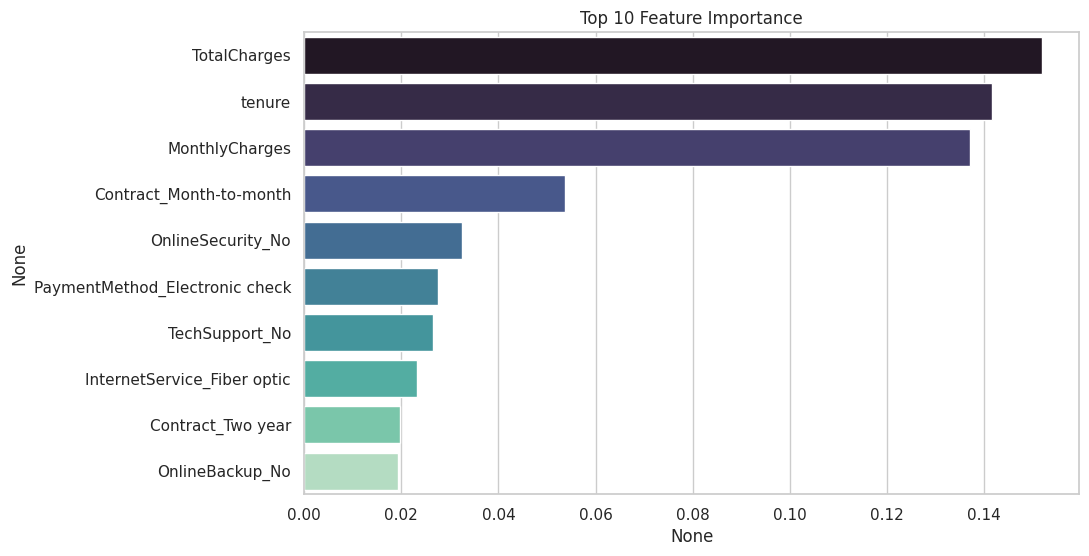

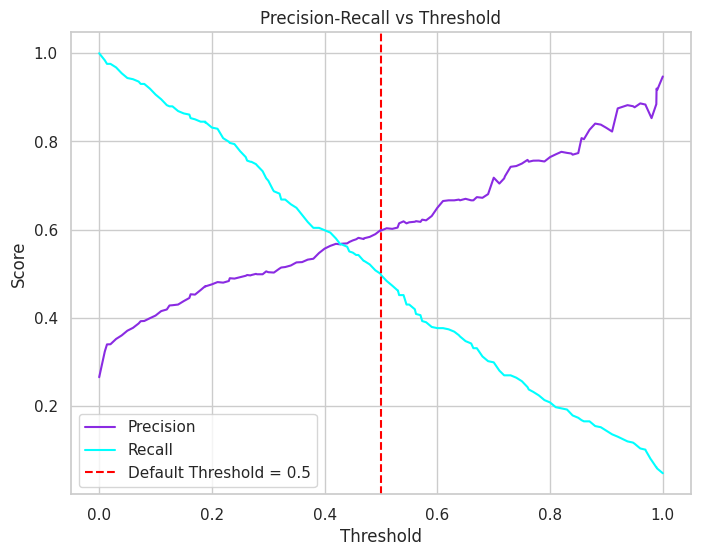


 Best Threshold: 0.210

 New Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      1033
           1       0.48      0.83      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.73      1407


 Confusion Matrix:
 [[699 334]
 [ 64 310]]

 ROC AUC: 0.8150537606576557


In [350]:
    ############# FINE TUNED RANDOM FOREST WITH ONLY TOP 10 FEATURES #######################

from sklearn.metrics import precision_recall_curve


# Fit Random Forest to Get Feature Importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get Top 10 Important Features
# Get feature importances from the model trained on all features
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_10_features = importance.nlargest(10).index

print("Top 10 Features:\n", top_10_features)

# Step 3: Keep Only Top 10 Features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Fit Random Forest with Top 10 Features
rf_model_top10 = RandomForestClassifier(n_estimators=100,
                                        class_weight='balanced',         ## Balancing class weights
                                        max_depth=None,
                                        min_samples_split=2,
                                        random_state=42)
rf_model_top10.fit(X_train_top10, y_train)


# Predictions
y_pred_top10 = rf_model_top10.predict(X_test_top10)
y_prob_top10 = rf_model_top10.predict_proba(X_test_top10)[:, 1]

# Evaluation
print("\n Accuracy with Top 10 Features:", accuracy_score(y_test, y_pred_top10))
print("\n Classification Report:\n", classification_report(y_test, y_pred_top10))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_top10))
print("\n ROC AUC with Top 10 Features:", roc_auc_score(y_test, y_prob_top10))

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_model_top10, X_test_top10, y_test)

#Plot Feature Importance for Top 10
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance[top_10_features], y=top_10_features, palette="mako")
plt.title("Top 10 Feature Importance")
plt.show()

rf_model_top10.fit(X_train_top10, y_train)


# Predictions
y_pred_top10 = rf_model_top10.predict(X_test_top10)
y_prob_top10 = rf_model_top10.predict_proba(X_test_top10)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_top10) ## To find the perfect threshold

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='#8A2BE2')
plt.plot(thresholds, recall[:-1], label='Recall', color='#00FFFF')
plt.axvline(0.5, linestyle='--', color='red', label='Default Threshold = 0.5')
plt.title('Precision-Recall vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

#  Find Best Threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\n Best Threshold: {best_threshold:.3f}")

# Predict Using Best Threshold
y_pred_tuned = (y_prob_top10 >= best_threshold).astype(int)

# Evaluate Performance After Tuning
print("\n New Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\n ROC AUC:", roc_auc_score(y_test, y_prob_top10))


As expected, there significant change in the model performance when with the perfect threshold of 0.210. The recall has increased drastically and now the model is capturing True positives quite well. In other words, the **senitivity has increased by 80%**!



---



**MODEL 3: Artificial Neural Network**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6543 - loss: 0.5905 - val_accuracy: 0.8009 - val_loss: 0.4184
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7963 - loss: 0.4290 - val_accuracy: 0.8080 - val_loss: 0.4054
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.4341 - val_accuracy: 0.8107 - val_loss: 0.4054
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8022 - loss: 0.4238 - val_accuracy: 0.8124 - val_loss: 0.4111
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.4356 - val_accuracy: 0.8089 - val_loss: 0.4065
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8073 - loss: 0.4051 - val_accuracy: 0.8080 - val_loss: 0.4062
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8089 - loss: 0.4050 - val_accuracy: 0.8098 - val_loss: 0.4075
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8128 - loss: 0.4079 - val_accuracy: 0.8098 - val_

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.



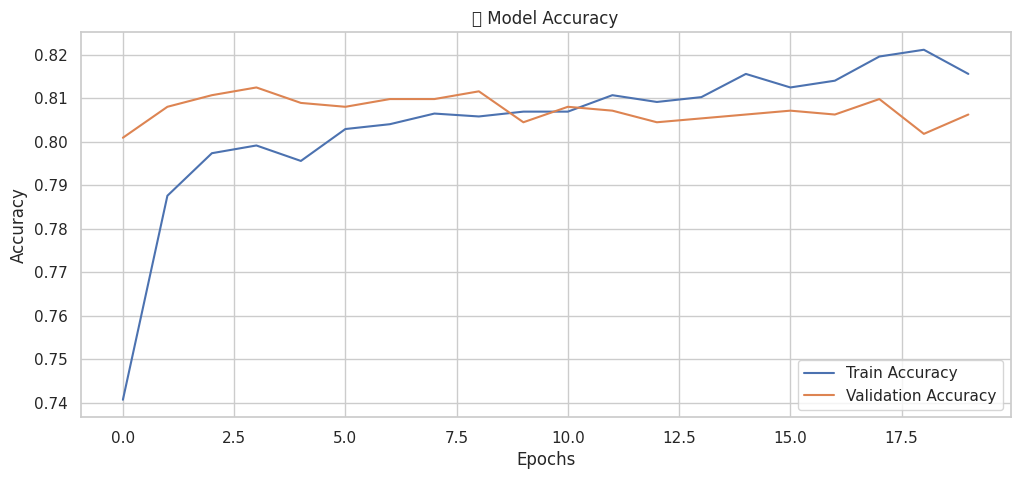

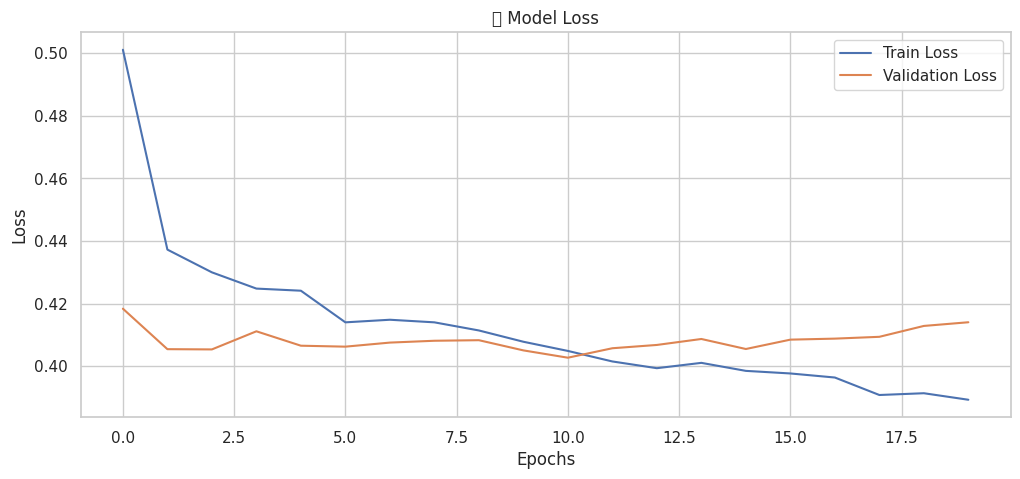

In [317]:
# Build Neural Network
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predictions
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
y_prob_nn = model.predict(X_test_scaled).flatten()

# Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\n Classification Report:\n", classification_report(y_test, y_pred_nn))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("\n ROC AUC:", roc_auc_score(y_test, y_prob_nn))

# Plot Training History


plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(' Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

MODEL PERFORMANCE: The ANN did a pretty good job but not necessaarily better than Logistic Regression and Random Forest. The true positive rate is low for actually churned customers.

**MODEL 4: XGBoost Classifier**



---



In [361]:
##################################### XGBoost ###############################################


# Handle Class Imbalance
pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# Train XGBoost Classifier
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=float(pos_weight),
    learning_rate=0.05,
    n_estimators=500,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Fit Model with Correct Early Stopping
xgb_model.fit(
    X_train_top10, y_train,
    eval_set=[(X_test_top10, y_test)],
    verbose=False
)

# Predict and Evaluate
y_prob_xgb = xgb_model.predict_proba(X_test_top10)[:, 1]
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

#  Performance Metrics
print("\n Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\n ROC AUC:", roc_auc_score(y_test, y_prob_xgb))



 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407


 Confusion Matrix:
 [[754 279]
 [ 81 293]]

 ROC AUC: 0.8327582815225889


**CONCLUSIONS:**


1. Random Forest with selected features and fine-tuning performed the best at predicting customer churn, achieving a strong Recall of 0.83.

2. XGBoost delivered impressive performance with a Recall of 0.78 — without requiring extensive fine-tuning.
Since predicting churn accurately is critical, Recall is the key metric of interest in this problem.
3. All models excelled at predicting customers who did not churn.
This is likely due to the imbalance in the training data, where the "Did not churn" category has more samples than the "Did churn" category.

4. Ensemble methods (especially Random Forest and XGBoost) outperformed other models on this dataset.
Given the current performance and ease of tuning, XGBoost appears to be the model of choice.
Further fine-tuning could potentially push the recall even higher.

5. It's not surprising that XGBoost handled the class imbalance well — it’s known for its ability to handle skewed data effectively.

**FUTURE IMPROVEMENTS**

🔹 Further fine-tuning of the XGBoost Classifier to maximize recall.
🔹 If hardware allows, test a more complex Neural Network architecture.
🔹 Address class imbalance more effectively using SMOTE resampling.
🔹 Incorporate customer feedback data for sentiment analysis to uncover deeper insights.

💡 **Final Recommendations (Business Perspective)**

👉 It costs less to retain an existing customer than to acquire a new one.

👉 The analysis shows that high product/service costs are a major driver of customer churn.

👉 Recommended next steps:

Conduct market research to benchmark pricing.
Develop a business strategy focused on cost reduction or added value to improve customer retention.
